# 🧠 Reto 46: Analizador de Datos de Encuestas 🧠

## 🏆 Objetivo: 

Desarrollar un programa en Python que procese y analice datos de encuestas almacenados en un archivo CSV, proporcionando estadísticas útiles y visualizaciones.  

## 📝 Requisitos:

1️⃣ El programa debe leer un archivo CSV que contenga respuestas a una encuesta. Cada fila representa una respuesta de un participante, y cada columna representa una pregunta.  
2️⃣ Debe calcular estadísticas básicas para preguntas numéricas, como media, mediana, moda y desviación estándar.  
3️⃣ Para preguntas categóricas, debe mostrar la frecuencia de cada respuesta.  
4️⃣ Generar visualizaciones gráficas (por ejemplo, histogramas, gráficos de barras) para representar los resultados de manera intuitiva.  
5️⃣ Permitir al usuario especificar el archivo CSV a analizar y seleccionar qué preguntas analizar.  
6️⃣ El programa debe manejar errores comunes, como archivos inexistentes o formatos incorrectos, y proporcionar mensajes de error claros.  

## 📌 Ejemplo de ejecución:

Ingrese el nombre del archivo CSV: encuesta_datos.csv  
Preguntas disponibles:  
1. Edad  
2. Satisfacción del servicio  
3. Frecuencia de uso  
Seleccione las preguntas a analizar (separadas por comas): 1,2  

Análisis de la pregunta: Edad  
- Media: 29.5  
- Mediana: 30  
- Moda: 28  
- Desviación estándar: 4.2  
[Se muestra un histograma de edades]  

Análisis de la pregunta: Satisfacción del servicio  
- Muy satisfecho: 40 respuestas  
- Satisfecho: 35 respuestas  
- Neutral: 15 respuestas  
- Insatisfecho: 5 respuestas  
- Muy insatisfecho: 5 respuestas  
[Se muestra un gráfico de barras de satisfacción]

## 🔍 Pistas:

🔹 Utiliza la biblioteca `pandas` para la manipulación y análisis de datos.  
🔹 La biblioteca `matplotlib` puede ser útil para crear las visualizaciones gráficas.  
🔹 Asegúrate de manejar excepciones al leer el archivo y al convertir datos para evitar que el programa falle con entradas inesperadas.  
🔹 Considera usar funciones como `mean()`, `median()`, `mode()` y `std()` de `pandas` para calcular las estadísticas.  
🔹 Para las preguntas categóricas, el método `value_counts()` de `pandas` te ayudará a contar la frecuencia de cada respuesta.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_name):
    """
    Loads a CSV file and returns its content as a DataFrame.
    :param file_name: The name of the CSV file to be loaded.
    :return: A pandas DataFrame containing the data, or None if an error occurs.
    """
    try:
        df = pd.read_csv(file_name)
        return df
    except FileNotFoundError:
        print(f"❌ The file '{file_name}' does not exist.")
        return None
    except Exception as e:
        print(f"❌ Error while loading the file: {e}")
        return None


In [4]:
def calculate_numeric_statistics(df, column_name):
    """
    Calculates and displays basic statistics for a numeric column.
    Also generates a histogram for the given column.
    :param df: The DataFrame containing the data.
    :param column_name: The name of the numeric column to analyze.
    """
    if column_name in df.columns:
        try:
            # Convert column to numeric, ignoring non-numeric values
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            stats = {
                'Mean': df[column_name].mean(),
                'Median': df[column_name].median(),
                'Mode': df[column_name].mode()[0] if not df[column_name].mode().empty else None,
                'Standard Deviation': df[column_name].std()
            }
            for stat_name, stat_value in stats.items():
                print(f"{stat_name}: {stat_value:.2f}" if stat_value is not None else f"{stat_name}: N/A")
            
            # Generate a histogram
            plt.hist(df[column_name].dropna(), bins=10, color='blue', alpha=0.7)
            plt.title(f"Histogram of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        except Exception as e:
            print(f"⚠️ Error calculating statistics: {e}")
    else:
        print(f"⚠️ Column '{column_name}' does not exist in the dataset.")


In [5]:
def show_categorical_frequencies(df, column_name):
    """
    Displays the frequency of each unique value in a categorical column.
    Also generates a bar chart for the given column.
    :param df: The DataFrame containing the data.
    :param column_name: The name of the categorical column to analyze.
    """
    if column_name in df.columns:
        try:
            frequencies = df[column_name].value_counts()
            print(f"\nFrequencies for column '{column_name}':")
            print(frequencies)

            # Generate a bar chart
            frequencies.plot(kind='bar', color='green', alpha=0.7)
            plt.title(f"Bar Chart of {column_name}")
            plt.xlabel("Responses")
            plt.ylabel("Frequency")
            plt.show()
        except Exception as e:
            print(f"⚠️ Error displaying frequencies: {e}")
    else:
        print(f"⚠️ Column '{column_name}' does not exist in the dataset.")



In [6]:
def survey_analysis():
    """
    Main function that prompts the user to select a CSV file and columns to analyze.
    Displays relevant statistics and visualizations for the selected columns.
    """
    file_name = input("Enter the name of the CSV file: ")
    df = load_data(file_name)
    if df is None or df.empty:
        print("⚠️ No data to analyze.")
        return
    
    print("\nAvailable questions (columns):")
    for idx, column_name in enumerate(df.columns):
        print(f"{idx + 1}. {column_name}")
    
    # Prompt user for column selection
    selection = input("\nSelect questions to analyze (comma-separated indexes): ")
    selected_columns = [df.columns[int(i) - 1] for i in selection.split(',') if i.isdigit()]
    
    for column_name in selected_columns:
        print(f"\nAnalyzing question: {column_name}")
        if pd.api.types.is_numeric_dtype(df[column_name]):
            calculate_numeric_statistics(df, column_name)
        else:
            show_categorical_frequencies(df, column_name)


Enter the name of the CSV file:  encuesta_datos.csv



Available questions (columns):
1. Edad
2. Satisfacción del servicio
3. Frecuencia de uso



Select questions to analyze (comma-separated indexes):  1,2,3



Analyzing question: Edad
Mean: 41.76
Median: 41.50
Mode: 29.00
Standard Deviation: 13.00


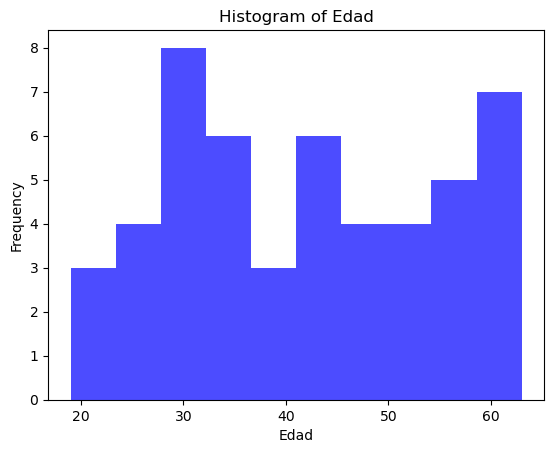


Analyzing question: Satisfacción del servicio

Frequencies for column 'Satisfacción del servicio':
Satisfacción del servicio
Insatisfecho        13
Neutral             11
Muy Insatisfecho    10
Muy Satisfecho      10
Satisfecho           6
Name: count, dtype: int64


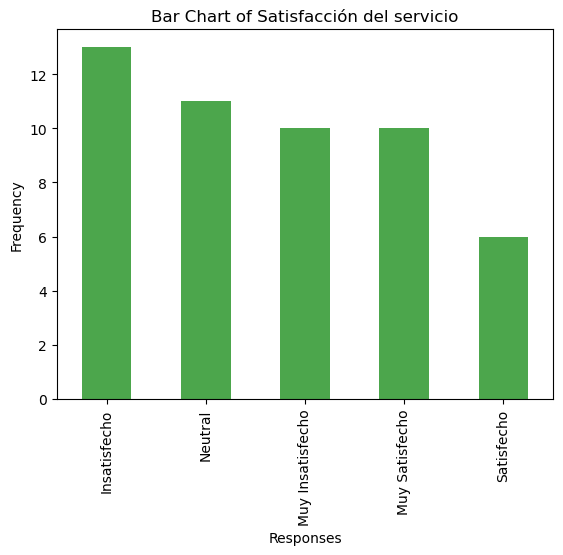


Analyzing question: Frecuencia de uso

Frequencies for column 'Frecuencia de uso':
Frecuencia de uso
Semanal     16
Mensual     12
Diario      12
Rara vez    10
Name: count, dtype: int64


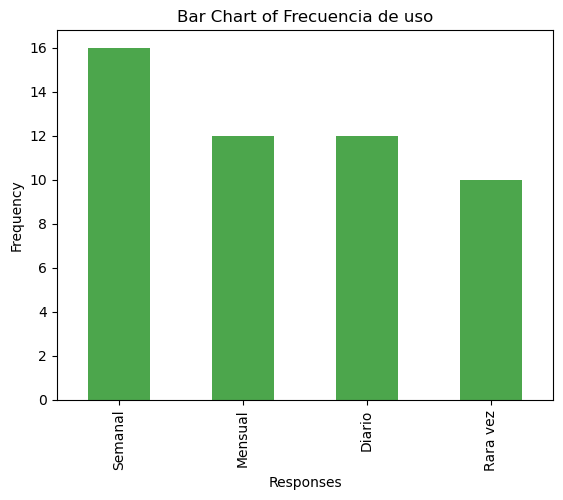

In [8]:
# Execute the program
survey_analysis()